In [139]:
import pandas as pp
import seaborn as sns
import requests
import json
import operator as op

In [129]:
response = requests.get('https://api.fbi.gov/wanted/v1/list')
data = json.loads(response.content)
field_office = list()
sample = list()
for x in data['items']:
    if x['field_offices'] != None:
     field_office.append(x['field_offices'])
     sample.append(x['field_offices'])
     
response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
    'page': 2
})
data = json.loads(response.content)
for x in data['items']:
    if x['field_offices'] != None:
     field_office.append(x['field_offices'])
     sample.append(x['field_offices'])
response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
    'page': 3
})
data = json.loads(response.content)
for x in data['items']:
    if x['field_offices'] != None:
     field_office.append(x['field_offices'])
     sample.append(x['field_offices'])

field_office = sum(field_office,[])
field_office = sorted(list(set(field_office)))
sample = sum(sample,[])





In [143]:
count = list()
for x in field_office:
   count.append(op.countOf(sample,x))
count


[2, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 8, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 4, 1, 3, 4]

In [145]:
df = pp.DataFrame({'Field_office': field_office,'Count of office': count})
df

,Field_office,Count of office
0,albuquerque,2
1,atlanta,3
2,boston,1
3,charlotte,1
4,chicago,3
5,cincinnati,1
6,cleveland,1
7,columbia,2
8,detroit,2
9,elpaso,1


<Axes: xlabel='Field_office', ylabel='Count of office'>

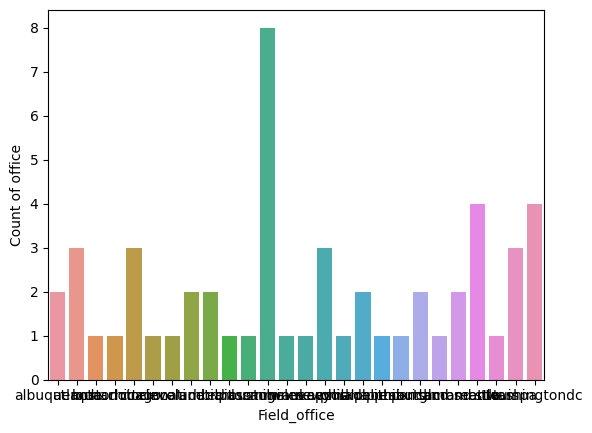

In [149]:
sns.barplot(x = 'Field_office',y = 'Count of office',data = df)